In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('anomaly_detection.csv')
df.head()

,date,value,agency,anomaly
0,2020-01-01,197,AAA,0
1,2020-01-01,404,CCC,0
2,2020-01-01,153,BBB,0
3,2020-01-02,205,AAA,0
4,2020-01-02,401,CCC,0


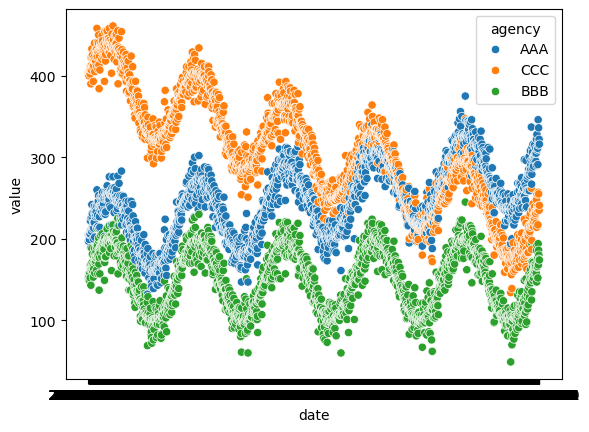

In [184]:
#df.plot(x=, y='value', kind = 'scatter', color='agency')
sns.scatterplot(data=df, x='date', y='value', hue='agency')
plt.show()

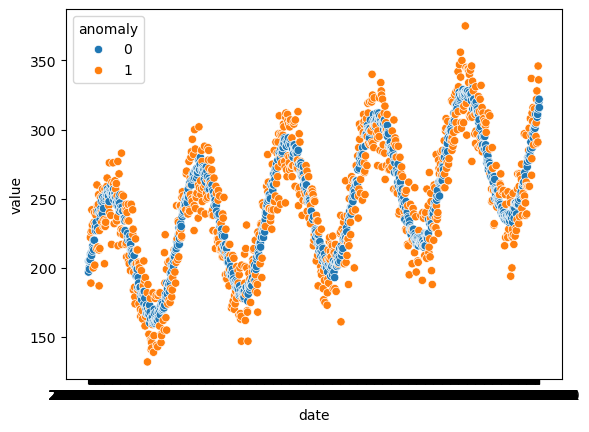

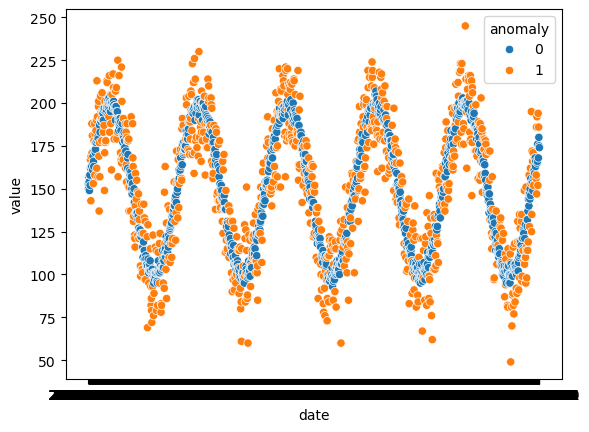

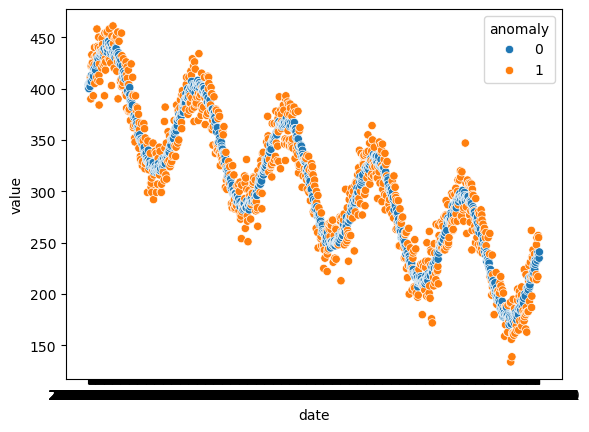

In [182]:
sns.scatterplot(data=df[df['agency'] == 'AAA'], x='date', y='value', hue='anomaly')
plt.show()
sns.scatterplot(data=df[df['agency'] == 'BBB'], x='date', y='value', hue='anomaly')
plt.show()
sns.scatterplot(data=df[df['agency'] == 'CCC'], x='date', y='value', hue='anomaly')
plt.show()

In [83]:
df.loc[(df['anomaly'] == 0) & (df['agency'] == 'AAA')].head(50)

,date,value,agency,anomaly
0,2020-01-01,197,AAA,0
3,2020-01-02,205,AAA,0
6,2020-01-03,205,AAA,0
9,2020-01-04,200,AAA,0
14,2020-01-05,199,AAA,0
16,2020-01-06,205,AAA,0
19,2020-01-07,206,AAA,0
22,2020-01-08,206,AAA,0
29,2020-01-10,210,AAA,0
37,2020-01-13,211,AAA,0


In [155]:
#Each date is unique for each agency, but also complete
import datetime
for agency in df['agency'].unique():
    print("Date Information for", agency)
    print(f'Number of Unique Days ' + agency +": ", df[df['agency'] == agency]['date'].nunique())
    num_dates_repeated = df[df['agency'] == agency]['date'].count() - df[df['agency'] == agency]['date'].nunique()
    print("Number of dates repeated: ", num_dates_repeated)

    
    end_date = datetime.datetime.strptime(df[df['agency'] == agency]['date'].iloc[-1], "%Y-%m-%d")
    start_date = datetime.datetime.strptime(df[df['agency'] == agency]['date'].iloc[0], "%Y-%m-%d")
    print("Days between first and last date: ",(end_date - start_date).days + 1)
    print()

Date Information for AAA
Number of Unique Days AAA:  1858
Number of dates repeated:  0
Days between first and last date:  1858

Date Information for CCC
Number of Unique Days CCC:  1858
Number of dates repeated:  0
Days between first and last date:  1858

Date Information for BBB
Number of Unique Days BBB:  1858
Number of dates repeated:  0
Days between first and last date:  1858



In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     5574 non-null   object
 1   value    5574 non-null   int64 
 2   agency   5574 non-null   object
 3   anomaly  5574 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.3+ KB


In [167]:
df.groupby('agency').sum().drop(columns = ['date', 'value'])

,anomaly
agency,
AAA,843
BBB,843
CCC,843


In [157]:
df.groupby('agency').count().drop(columns = ['date', 'value'])

,anomaly
agency,
AAA,1858
BBB,1858
CCC,1858


In [177]:
df['date'].value_counts()

3